In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


**library imported**

In [9]:
df =pd.read_csv('weatherAUS.csv')

In [11]:
df.head().T

0           1           2           3           4
Date           2008-12-01  2008-12-02  2008-12-03  2008-12-04  2008-12-05
Location           Albury      Albury      Albury      Albury      Albury
MinTemp              13.4         7.4        12.9         9.2        17.5
MaxTemp              22.9        25.1        25.7          28        32.3
Rainfall              0.6           0           0           0           1
Evaporation           NaN         NaN         NaN         NaN         NaN
Sunshine              NaN         NaN         NaN         NaN         NaN
WindGustDir             W         WNW         WSW          NE           W
WindGustSpeed          44          44          46          24          41
WindDir9am              W         NNW           W          SE         ENE
WindDir3pm            WNW         WSW         WSW           E          NW
WindSpeed9am           20           4          19          11           7
WindSpeed3pm           24          22          26           9          20
Humidity9am            71          44          38          45          82
Humidity3pm            22          25          30          16          33
Pressure9am        1007.7      1010.6      1007.6      1017.6      1010.8
Pressure3pm        1007.1      1007.8      1008.7      1012.8        1006
Cloud9am                8         NaN         NaN         NaN           7
Cloud3pm              NaN         NaN           2         NaN           8
Temp9am              16.9        17.2          21        18.1        17.8
Temp3pm              21.8        24.3        23.2        26.5        29.7
RainToday              No          No          No          No          No
RISK_MM                 0           0           0           1         0.2
RainTomorrow           No          No          No          No          No

**WE will drop data that will not be required like date wind direction etc **

In [12]:
df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RISK_MM'], axis=1, inplace=True)
df.head()

MinTemp  MaxTemp  Rainfall  ...  Temp3pm  RainToday  RainTomorrow
0     13.4     22.9       0.6  ...     21.8         No            No
1      7.4     25.1       0.0  ...     24.3         No            No
2     12.9     25.7       0.0  ...     23.2         No            No
3      9.2     28.0       0.0  ...     26.5         No            No
4     17.5     32.3       1.0  ...     29.7         No            No

[5 rows x 18 columns]

In [15]:
##filling the data that is not available by the mean
df.fillna(df.mean(),inplace=True)

In [16]:
df.head()

MinTemp  MaxTemp  Rainfall  ...  Temp3pm  RainToday  RainTomorrow
0     13.4     22.9       0.6  ...     21.8         No            No
1      7.4     25.1       0.0  ...     24.3         No            No
2     12.9     25.7       0.0  ...     23.2         No            No
3      9.2     28.0       0.0  ...     26.5         No            No
4     17.5     32.3       1.0  ...     29.7         No            No

[5 rows x 18 columns]

In [18]:
df.RainToday=[1 if each== 'Yes' else 0 for each in df.RainToday]
df.RainTomorrow=[1 if each== 'Yes' else 0 for each in df.RainTomorrow]

In [19]:
df.head(3)

MinTemp  MaxTemp  Rainfall  ...  Temp3pm  RainToday  RainTomorrow
0     13.4     22.9       0.6  ...     21.8          0             0
1      7.4     25.1       0.0  ...     24.3          0             0
2     12.9     25.7       0.0  ...     23.2          0             0

[3 rows x 18 columns]

In [21]:
y= df.RainTomorrow.values
x_data=df.drop('RainTomorrow',axis=1)
x_data.head()

MinTemp  MaxTemp  Rainfall  ...  Temp9am  Temp3pm  RainToday
0     13.4     22.9       0.6  ...     16.9     21.8          0
1      7.4     25.1       0.0  ...     17.2     24.3          0
2     12.9     25.7       0.0  ...     21.0     23.2          0
3      9.2     28.0       0.0  ...     18.1     26.5          0
4     17.5     32.3       1.0  ...     17.8     29.7          0

[5 rows x 17 columns]

In [26]:
x_data.describe()

MinTemp       MaxTemp  ...       Temp3pm     RainToday
count  84431.000000  84431.000000  ...  84431.000000  84431.000000
mean      11.244557     22.154927  ...     20.686494      0.225095
std        6.100500      6.871608  ...      6.641888      0.417647
min       -8.500000     -4.800000  ...     -5.400000      0.000000
25%        6.900000     17.300000  ...     16.100000      0.000000
50%       11.244557     21.700000  ...     20.400000      0.000000
75%       15.900000     26.600000  ...     24.900000      0.000000
max       31.900000     47.300000  ...     46.700000      1.000000

[8 rows x 17 columns]

In [23]:
##normalisation of data
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

MinTemp   MaxTemp  Rainfall  ...   Temp9am   Temp3pm  RainToday
0  0.542079  0.531670  0.001617  ...  0.536748  0.522073        0.0
1  0.393564  0.573896  0.000000  ...  0.543430  0.570058        0.0
2  0.529703  0.585413  0.000000  ...  0.628062  0.548944        0.0
3  0.438119  0.629559  0.000000  ...  0.563474  0.612284        0.0
4  0.643564  0.712092  0.002695  ...  0.556793  0.673704        0.0

[5 rows x 17 columns]

**Here X is feature variable and y is target variable i.e rain tomorrow** 

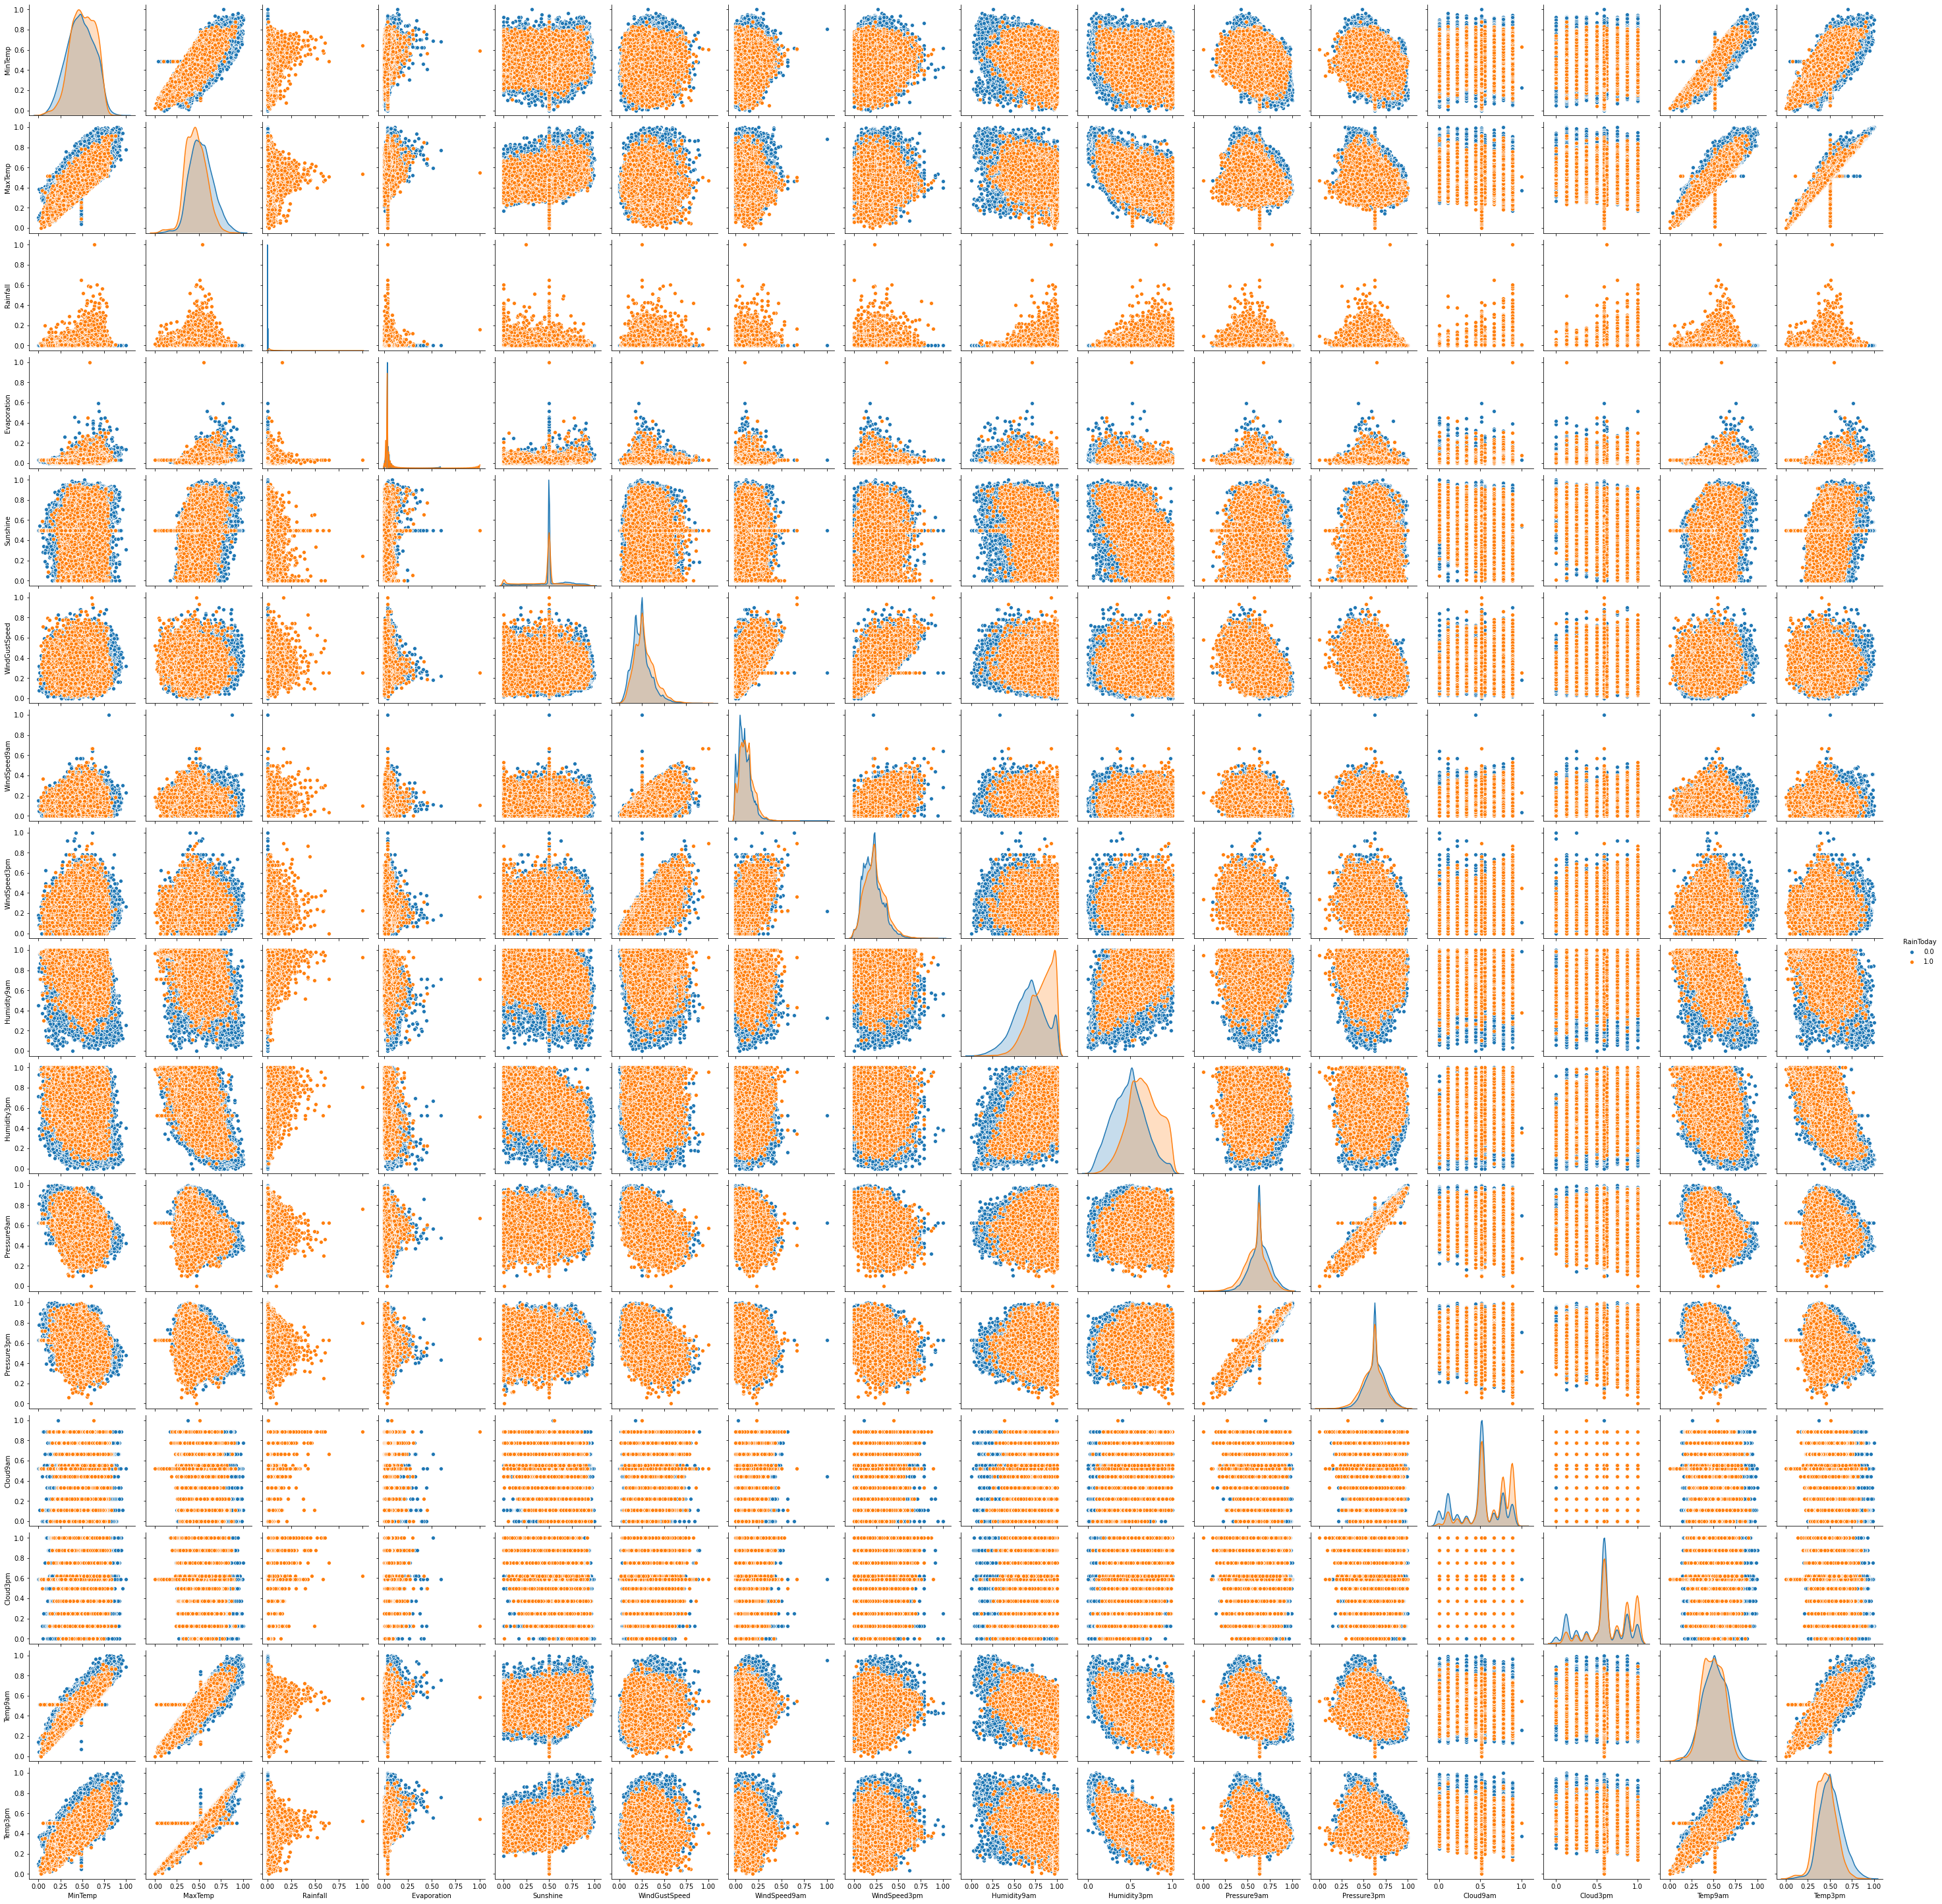

In [28]:
sns.pairplot(x ,hue='RainToday')

In [35]:
# importing sklearn's library for splitting our dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=105)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( max_iter=1100)
model.fit(x_train ,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
print('Test accuracy of sklearn logistic regression library: {}'.format(model.score(x_test, y_test)))

Test accuracy of sklearn logistic regression library: 0.8370344051637354


In [49]:
predictions = model.predict(x_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     13025
           1       0.71      0.48      0.57      3862

    accuracy                           0.84     16887
   macro avg       0.79      0.71      0.74     16887
weighted avg       0.83      0.84      0.82     16887

